# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

### How the datasets looks like:

In [6]:
websites.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.0,1


### Data types:

In [7]:
websites.dtypes.value_counts()

int64      12
object      7
float64     2
dtype: int64

### Which columns contain the features of the websites

In [8]:
websites_features=websites.columns[:-1]
websites_features

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES'],
      dtype='object')

### Which column contains the feature we will predict? 

*  "Type" column is the feature we want to predict

In [19]:
column_to_predict=websites.iloc[:,-1:] 
column_to_predict

,Type
0,1
1,0
2,0
3,0
4,0
...,...
1776,1
1777,1
1778,0
1779,0


<AxesSubplot:xlabel='Type', ylabel='count'>

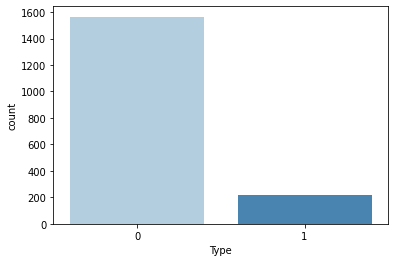

In [14]:
#cuántos vinos con cada calidad
sns.countplot(x=websites.Type, palette="Blues")

### What is the code standing for benign vs malicious websites?

In [20]:
Bening =0
malicious=1

### Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns

In [21]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [22]:
num=["int64","float64"]
df_num_list=[]

for c in websites.columns:
    if websites[c].dtype in num:
            df_num_list.append(c)
            
df_num_list    

['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_PACKETS',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'APP_PACKETS',
 'DNS_QUERY_TIMES',
 'Type']

In [23]:
# Your code here
websites_num = websites[df_num_list]
# This way I can see what columns have highest absolute correlation sum, to keep that columns 
# (removing collinearity) and to increase the algo accuracy.
websites_num.corr().abs().sum().sort_values(ascending=False)

SOURCE_APP_PACKETS           7.259321
APP_PACKETS                  7.259321
REMOTE_APP_PACKETS           7.229310
TCP_CONVERSATION_EXCHANGE    7.198662
DIST_REMOTE_TCP_PORT         5.774302
SOURCE_APP_BYTES             5.484392
REMOTE_APP_BYTES             4.831454
APP_BYTES                    4.820829
DNS_QUERY_TIMES              3.812115
REMOTE_IPS                   3.513477
NUMBER_SPECIAL_CHARACTERS    2.763512
URL_LENGTH                   2.589325
CONTENT_LENGTH               2.002322
Type                         1.972359
dtype: float64

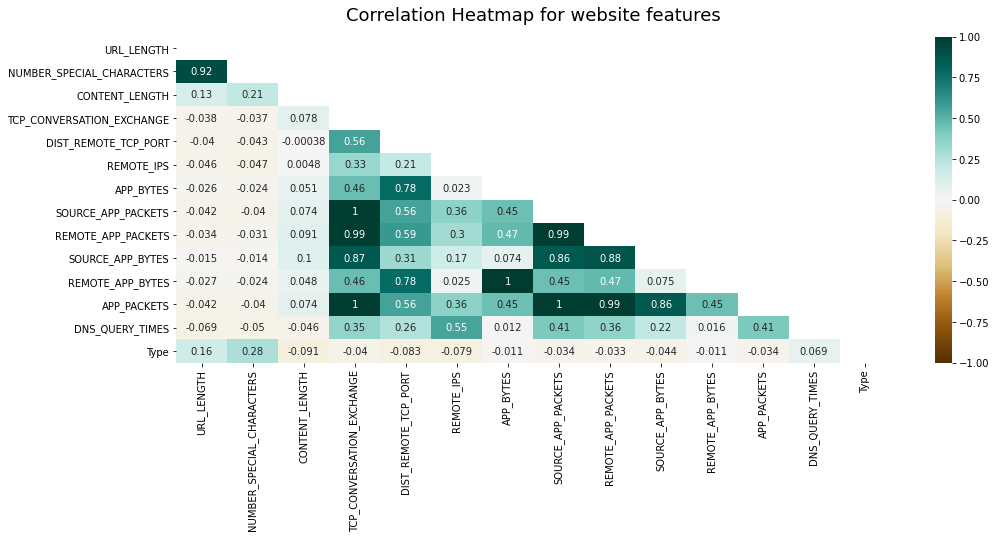

In [24]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(websites_num.corr(), dtype=np.bool_))
heatmap = sns.heatmap(websites_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for website features', fontdict={'fontsize':18}, pad=16);

In [25]:
# Your comment here
# we might need to remove, due to high collinearity, following columns:
# APP_PACKETS
# REMOTE_APP_PACKETS
# REMOTE_APP_BYTES

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

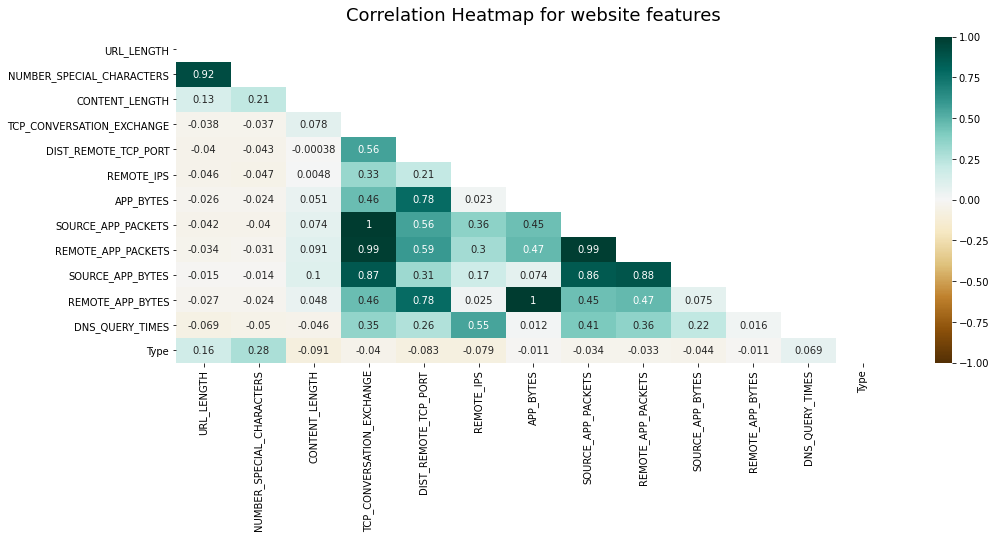

In [26]:
# Your code here
# I`ll remove one column just to try.
df_num_list.remove("APP_PACKETS")

websites_num = websites[df_num_list]
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(websites_num.corr(), dtype=np.bool_))
heatmap = sns.heatmap(websites_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for website features', fontdict={'fontsize':18}, pad=16);

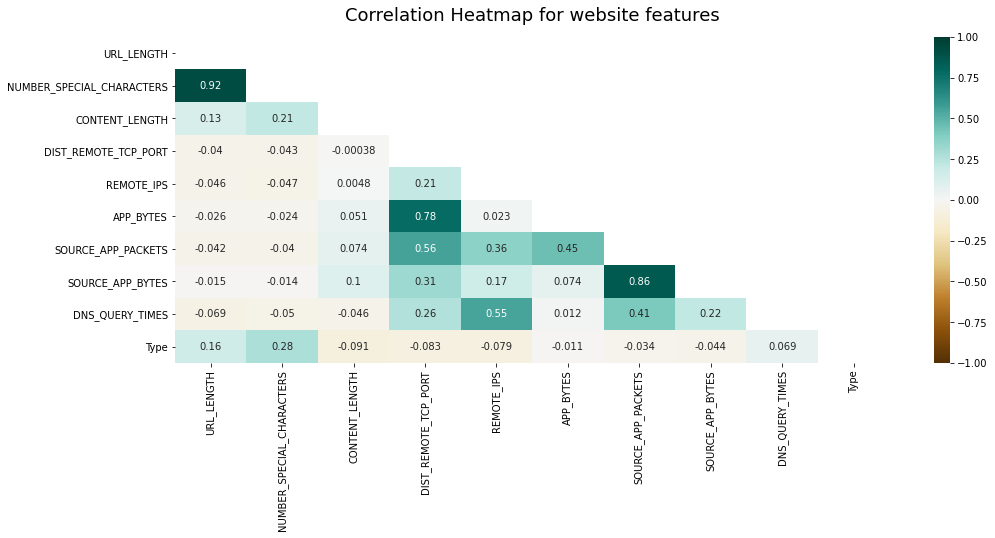

In [27]:
# Print heatmap again
# Here I'll remove all collinearity I could find
final_columns = ['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'DNS_QUERY_TIMES',
 'Type']

websites = websites.drop(["APP_PACKETS","REMOTE_APP_PACKETS","REMOTE_APP_BYTES"], axis=1)

final_websites_num = websites[final_columns]
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(final_websites_num.corr(), dtype=np.bool_))
heatmap = sns.heatmap(final_websites_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for website features', fontdict={'fontsize':18}, pad=16);


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [28]:
def null_cols(websites):
    nulls = websites.isna().sum()
    return nulls[nulls > 0] / len(websites) * 100
null_cols(websites)

SERVER              0.056148
CONTENT_LENGTH     45.592364
DNS_QUERY_TIMES     0.056148
dtype: float64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [29]:
missing_values_rate_SERVER = round((websites["SERVER"].isnull().sum())/(len(websites["SERVER"]))*100,2)
print("missing values on SERVER: ", missing_values_rate_SERVER, "%")
missing_values_rate_CONTENT_LENGTH = round((websites["CONTENT_LENGTH"].isnull().sum())/(len(websites["CONTENT_LENGTH"]))*100,2)
print("missing values on CONTENT_LENGTH: ", missing_values_rate_CONTENT_LENGTH, "%")
missing_values_rate_DNS_QUERY_TIMES = round((websites["DNS_QUERY_TIMES"].isnull().sum())/(len(websites["DNS_QUERY_TIMES"]))*100,2)
print("missing values on DNS_QUERY_TIMES: ", missing_values_rate_DNS_QUERY_TIMES, "%")

missing values on SERVER:  0.06 %
missing values on CONTENT_LENGTH:  45.59 %
missing values on DNS_QUERY_TIMES:  0.06 %


In [30]:
websites.drop(['CONTENT_LENGTH'], inplace=True, axis=1)

In [31]:
print(websites.shape)
websites.isna().sum()

(1781, 17)


URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [32]:
websites = websites.dropna()

In [33]:
print(websites.shape)
websites.isna().sum()

(1779, 17)


URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [34]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [35]:
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.replace(["[u'GB'; u'UK']",'United Kingdom',"UK" ],"GB")

In [36]:
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.replace("us", "US")

In [37]:
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.replace("Cyprus", "CY")

In [38]:
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.replace("se", "SE")

In [39]:
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.replace("ru", "RU")

In [40]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

<AxesSubplot:xlabel='WHOIS_COUNTRY', ylabel='count'>

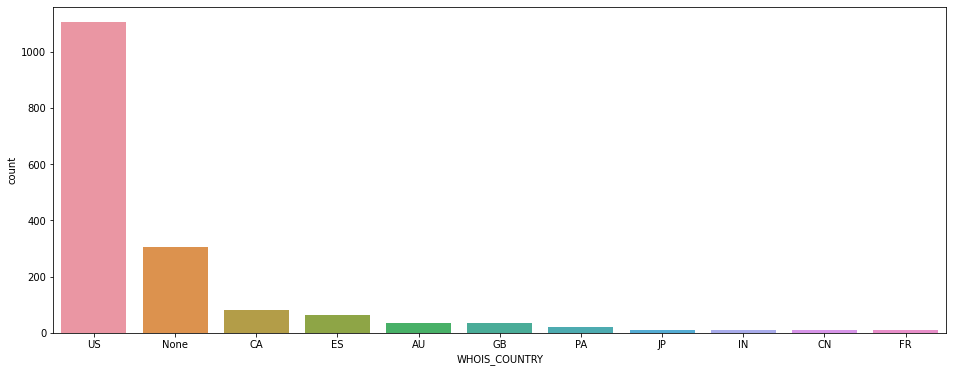

In [41]:
#PLOT TOP 10 COUNTRIES & NONE (COUNT)
plt.figure(figsize=(16, 6))
sns.countplot(x=websites.WHOIS_COUNTRY,
              data = websites,
              order = websites.WHOIS_COUNTRY.value_counts().iloc[:11].index, )

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [42]:
top_10_countries = websites.WHOIS_COUNTRY.value_counts()[:11]
top_10_countries

US      1105
None     306
CA        83
ES        63
AU        35
GB        35
PA        21
JP        11
IN        10
CN        10
FR         9
Name: WHOIS_COUNTRY, dtype: int64

In [43]:
#COUNTRIES FROM TOP 11 UNTIL THE END
rest=dict(websites.WHOIS_COUNTRY.value_counts()[11:])
print(rest)

{'CZ': 9, 'NL': 6, 'RU': 6, 'CH': 6, 'KR': 5, 'PH': 4, 'SE': 4, 'BS': 4, 'AT': 4, 'TR': 3, 'BE': 3, 'DE': 3, 'KY': 3, 'HK': 3, 'SC': 3, 'KG': 2, 'UA': 2, 'BR': 2, 'NO': 2, 'IL': 2, 'CY': 2, 'UY': 2, 'SI': 2, 'LV': 1, 'IT': 1, 'LU': 1, 'UG': 1, 'BY': 1, 'TH': 1, 'PK': 1, 'IE': 1, 'AE': 1}


In [44]:
#TO A LIST
countries_to_subs=list(rest.keys())
print(countries_to_subs)

['CZ', 'NL', 'RU', 'CH', 'KR', 'PH', 'SE', 'BS', 'AT', 'TR', 'BE', 'DE', 'KY', 'HK', 'SC', 'KG', 'UA', 'BR', 'NO', 'IL', 'CY', 'UY', 'SI', 'LV', 'IT', 'LU', 'UG', 'BY', 'TH', 'PK', 'IE', 'AE']


In [45]:
#REPLACE THIS COUNTRIES FOR OTHER
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.replace(countries_to_subs, "Other")

In [46]:
#REPLACE NONE FOR OTHER
websites.WHOIS_COUNTRY=websites.WHOIS_COUNTRY.replace("None", "Other")

In [47]:
websites.WHOIS_COUNTRY.unique()

array(['Other', 'US', 'GB', 'AU', 'CA', 'PA', 'IN', 'FR', 'JP', 'CN',
       'ES'], dtype=object)

In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
websites["numeric_country"] = le.fit_transform(websites.WHOIS_COUNTRY)
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,numeric_country
0,M0_109,16,7,iso-8859-1,nginx,Other,None,10/10/2015 18:21,None,7,0,2,700,9,1153,2.0,1,8
1,B0_2314,16,6,UTF-8,Apache/2.4.10,Other,None,None,None,17,7,4,1230,17,1265,0.0,0,8
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,Other,None,None,None,0,0,0,0,0,0,0.0,0,8
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,18784,8.0,0,10
4,B0_403,17,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,129889,4.0,0,10


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [49]:
websites.drop(columns = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace = True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [50]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   URL_LENGTH                 1779 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 3   CHARSET                    1779 non-null   object 
 4   SERVER                     1779 non-null   object 
 5   WHOIS_COUNTRY              1779 non-null   object 
 6   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 7   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 8   REMOTE_IPS                 1779 non-null   int64  
 9   APP_BYTES                  1779 non-null   int64  
 10  SOURCE_APP_PACKETS         1779 non-null   int64  
 11  SOURCE_APP_BYTES           1779 non-null   int64  
 12  DNS_QUERY_TIMES            1779 non-null   float64
 13  Type                       1779 non-null   int64

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [51]:
websites.drop("URL", inplace = True, axis=1)

In [52]:
#websites.drop(columns = ["URL"], inplace = True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [53]:
websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [54]:
websites.CHARSET=websites.CHARSET.replace(['iso-8859-1', 'ISO-8859-1'],'ISO-8859')

In [55]:
websites.CHARSET=websites.CHARSET.replace('UTF-8', 'utf-8')

In [56]:
websites.CHARSET.unique()

array(['ISO-8859', 'utf-8', 'us-ascii', 'None', 'windows-1251',
       'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [57]:
websites.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../think-hard.jpg)

In [58]:
# Your code here
servers = []
for s in websites["SERVER"]:
    
    if "microsoft" in s.lower():
        servers.append("Microsoft")
    
    elif "apache" in s.lower():
        servers.append("Apache")
    
    elif  "nginx" in s.lower():
        servers.append("nginx")
    
    else: servers.append("Other")

print(len(websites["SERVER"]))
print(len(servers))
websites["SERVER"] = servers


1779
1779


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [59]:
websites["SERVER"].unique()

array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [60]:
#websites.head()

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [61]:
website_dummy  = pd.get_dummies(websites, columns=["CHARSET","WHOIS_COUNTRY","SERVER"], drop_first=False)
website_dummy 

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,...,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US,SERVER_Apache,SERVER_Microsoft,SERVER_Other,SERVER_nginx
0,16,7,7,0,2,700,9,1153,2.0,1,...,0,0,0,1,0,0,0,0,0,1
1,16,6,17,7,4,1230,17,1265,0.0,0,...,0,0,0,1,0,0,1,0,0,0
2,16,6,0,0,0,0,0,0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
3,17,6,31,22,3,3812,39,18784,8.0,0,...,0,0,0,0,0,1,0,0,0,1
4,17,6,57,2,5,4278,61,129889,4.0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,0,0,0,0,0,186,0.0,1,...,0,0,0,0,0,0,1,0,0,0
1777,198,17,0,0,0,0,0,124,0.0,1,...,0,0,0,0,0,0,1,0,0,0
1778,201,34,83,2,6,6631,87,132181,4.0,0,...,0,0,0,0,0,1,1,0,0,0
1779,234,34,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,1,0,0,0,1


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [62]:
top_SERVER = websites.SERVER.value_counts()
top_SERVER

Apache       642
Other        503
nginx        436
Microsoft    198
Name: SERVER, dtype: int64

In [63]:
top_WHOIS_COUNTRY = websites.WHOIS_COUNTRY.value_counts()
top_WHOIS_COUNTRY

US       1105
Other     397
CA         83
ES         63
GB         35
AU         35
PA         21
JP         11
IN         10
CN         10
FR          9
Name: WHOIS_COUNTRY, dtype: int64

In [64]:
top_CHARSET= websites.CHARSET.value_counts()
top_CHARSET

utf-8           1053
ISO-8859         562
us-ascii         155
None               7
windows-1251       1
windows-1252       1
Name: CHARSET, dtype: int64

In [65]:
cat_columns=website_dummy.keys()[11:-1]
cat_columns

Index(['CHARSET_ISO-8859', 'CHARSET_None', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'WHOIS_COUNTRY_AU',
       'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES',
       'WHOIS_COUNTRY_FR', 'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_Other', 'WHOIS_COUNTRY_PA',
       'WHOIS_COUNTRY_US', 'SERVER_Apache', 'SERVER_Microsoft',
       'SERVER_Other'],
      dtype='object')

In [66]:
#Ha mantenido todos los valores en los dummies

In [67]:
website_dummy.isnull().sum().sum()

0

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


In [69]:
df=website_dummy.copy()

In [70]:
df = df.rename(columns={'Type': 'target'})
numeric_cols = list(set(df.columns)-set(cat_columns)-{'target'})
print("numeric columns:", numeric_cols)
print("Cat columns:", cat_columns)

numeric columns: ['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'SOURCE_APP_BYTES', 'REMOTE_IPS', 'SOURCE_APP_PACKETS', 'DNS_QUERY_TIMES', 'APP_BYTES', 'SERVER_nginx', 'URL_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'numeric_country']
Cat columns: Index(['CHARSET_ISO-8859', 'CHARSET_None', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'WHOIS_COUNTRY_AU',
       'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES',
       'WHOIS_COUNTRY_FR', 'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_Other', 'WHOIS_COUNTRY_PA',
       'WHOIS_COUNTRY_US', 'SERVER_Apache', 'SERVER_Microsoft',
       'SERVER_Other'],
      dtype='object')


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [71]:
from sklearn.model_selection import train_test_split

* test_size = 0.2: keep 20% of the original dataset as the test dataset, i.e., 80% as the training dataset.
* stratify=website_dummy[‘target’]: when the dataset is imbalanced, it’s good practice to do stratified sampling. In this way, both the training and test datasets will have similar portions of the target classes as the complete dataset.

In [72]:
columnas_x = [a for a in (list(df.columns)) if a != "target"]
X= df[columnas_x]
y=df.target

To verify the specifications, we can print out the shapes and the classes of target for both the training and test sets.

In [73]:
random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])
print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(1423, 32)
(356, 32)

0    0.878426
1    0.121574
Name: target, dtype: float64

0    0.879213
1    0.120787
Name: target, dtype: float64


Before fitting the model, let’s also scale the numerical variables, which is another common practice in machine learning.

After creating a class of StandardScaler, we calculate (fit) the mean and standard deviation for scaling using df_train’s numeric_cols. Then we create a function get_features_and_target_arrays that:

performs standardization on the numeric_cols of df to return the new array X_numeric_scaled. 
transforms cat_cols to a NumPy array X_categorical.
combines both arrays back to the entire feature array X.
assigns the target column to y.
Then we can apply this function to the training dataset to output our training feature and target, X and y.

This step has to be done after the train test split since the scaling calculations are based on the training dataset.



In [74]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_columns, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_columns].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_columns, scaler)

In [75]:
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.
clf.fit(X, y)

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [76]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='none', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(penalty='none')

In [77]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_columns, scaler)

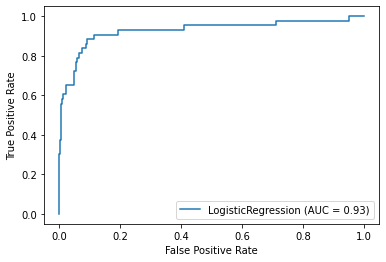

In [78]:
plot_roc_curve(clf, X_test, y_test)

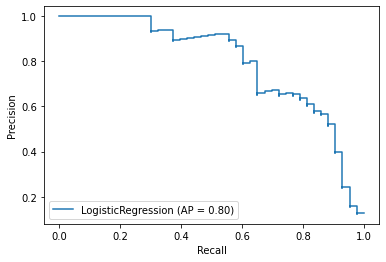

In [79]:
plot_precision_recall_curve(clf, X_test, y_test)

To calculate other metrics, we need to get the prediction results from the test dataset:

predict_proba to get the predicted probability of the logistic regression for each class in the model.
The first column of the output of predict_proba is P(target = 0), and the second column is P(target = 1). So we are calling for the second column by its index position 1.
predict the test dataset labels by choosing the class with the highest probability, which means a threshold of 0.5 in this binary example.

In [80]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [81]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))
print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.21107
AUC = 0.92711
Average Precision = 0.79657

Using 0.5 as threshold:
Accuracy = 0.93820
Precision = 0.83871
Recall = 0.60465
F1 score = 0.70270

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       313
           1       0.84      0.60      0.70        43

    accuracy                           0.94       356
   macro avg       0.89      0.79      0.83       356
weighted avg       0.93      0.94      0.93       356



Confusion Matrix


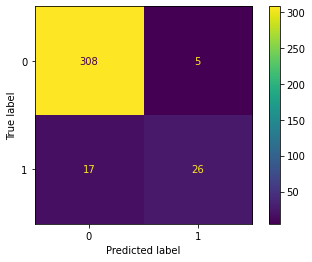

In [82]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [83]:
coefficients = np.hstack((clf.coef_[0]))
coefficients

array([ -1.05953752,  -9.53163531,  -3.74358407,  -1.22418708,
        12.40025926,   0.        ,  -9.48009132,   1.47902356,
         4.31451315,  15.45303142,  -9.77805509,   1.50755122,
         0.6835773 ,  -7.39321615,   0.55807638,   0.63500964,
        -1.13810484,  -0.64387745,   1.32674861,  -2.96585894,
         2.43439647, -11.60404914,  -5.34591619,  -0.64281498,
         2.78427869,   0.76619937,  -6.77834415,  -0.16566997,
        -2.73805584,   3.04551798,   1.01679398])

In [84]:
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,NUMBER_SPECIAL_CHARACTERS,4.544169
1,DIST_REMOTE_TCP_PORT,23.781029
2,SOURCE_APP_BYTES,74961.939018
3,REMOTE_IPS,3.339428
4,SOURCE_APP_PACKETS,44.621662
5,DNS_QUERY_TIMES,2.919271
6,APP_BYTES,62671.816227
7,SERVER_nginx,0.435519
8,URL_LENGTH,27.058256
9,TCP_CONVERSATION_EXCHANGE,43.560705


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Aplicación del modelo con gradient descent
regression = LogisticRegression()
coef = regression.fit(X_train, y_train)
y_predict = regression.predict(X_test)

# Aplicación del modelo con librería de sklearn
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train, y_train)
y_predict_py = logistic.predict(X_test)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [87]:
# Matriz de confusión para ver resultados finales
from sklearn.metrics import confusion_matrix
cm_sklearn = confusion_matrix(y_test, y_predict_py)
cm_GD = confusion_matrix(y_test, y_predict)

Confusion Matrix


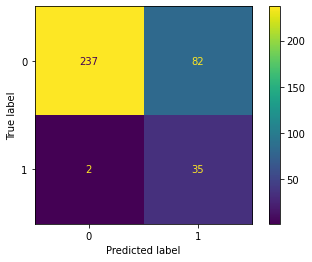

In [86]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

What are your thoughts on the performance of the model? Write your conclusions below.

Once a model is defined, you can check its performance with .predict_proba(), which returns the matrix of probabilities that the predicted output is equal to zero or one:

#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [90]:
#Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [91]:
#split dataset in features and target variable
columnas_x = [a for a in (list(df.columns)) if a != "target"]
X= df[columnas_x] # Features
y=df.target # Target variable

In [110]:
# Create Decision Tree classifer object/
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test
dtree_model = DecisionTreeClassifier(max_depth = 3).fit(X_train1, y_train1) 
dtree_predictions = dtree_model.predict(X_test1) 
from sklearn.metrics import classification_report
print(classification_report(dtree_predictions,y_test1))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       344
           1       0.29      1.00      0.45        12

    accuracy                           0.92       356
   macro avg       0.65      0.96      0.70       356
weighted avg       0.98      0.92      0.94       356



To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

[Text(527.5636363636363, 475.65000000000003, 'WHOIS_COUNTRY_ES <= 0.5\ngini = 0.216\nsamples = 1423\nvalue = [1248, 175]'),
 Text(324.6545454545454, 339.75, 'WHOIS_COUNTRY_Other <= 0.5\ngini = 0.166\nsamples = 1372\nvalue = [1247, 125]'),
 Text(162.3272727272727, 203.85000000000002, 'SOURCE_APP_BYTES <= 62.0\ngini = 0.093\nsamples = 1059\nvalue = [1007, 52]'),
 Text(81.16363636363636, 67.94999999999999, 'gini = 0.0\nsamples = 412\nvalue = [412, 0]'),
 Text(243.49090909090907, 67.94999999999999, 'gini = 0.148\nsamples = 647\nvalue = [595, 52]'),
 Text(486.98181818181814, 203.85000000000002, 'DIST_REMOTE_TCP_PORT <= 1.5\ngini = 0.358\nsamples = 313\nvalue = [240, 73]'),
 Text(405.81818181818176, 67.94999999999999, 'gini = 0.478\nsamples = 175\nvalue = [106, 69]'),
 Text(568.1454545454545, 67.94999999999999, 'gini = 0.056\nsamples = 138\nvalue = [134, 4]'),
 Text(730.4727272727272, 339.75, 'SERVER_Apache <= 0.5\ngini = 0.038\nsamples = 51\nvalue = [1, 50]'),
 Text(649.3090909090909, 203.8

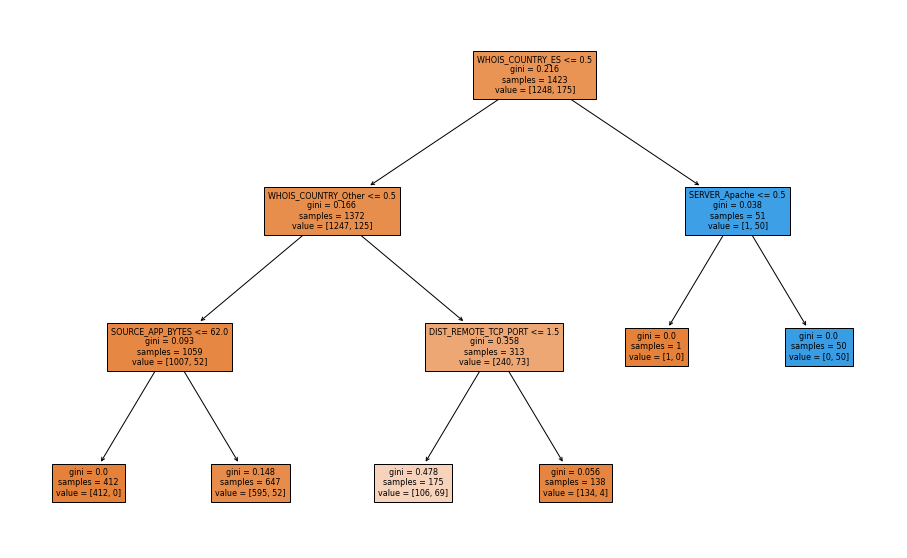

In [114]:
fig1 = plt.figure(figsize = (16,10))
from sklearn import tree
tree.plot_tree(dtree_model,filled=True,feature_names= X.columns,fontsize=8)

We'll create another DecisionTreeClassifier model with max_depth=5.
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [112]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
dtree_model2 = DecisionTreeClassifier(max_depth = 5).fit(X_train2, y_train2) 
dtree_predictions = dtree_model.predict(X_test2) 
from sklearn.metrics import classification_report
print(classification_report(dtree_predictions,y_test2))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       344
           1       0.29      1.00      0.45        12

    accuracy                           0.92       356
   macro avg       0.65      0.96      0.70       356
weighted avg       0.98      0.92      0.94       356



[Text(590.8235294117646, 498.3, 'WHOIS_COUNTRY_ES <= 0.5\ngini = 0.216\nsamples = 1423\nvalue = [1248, 175]'),
 Text(393.88235294117646, 407.70000000000005, 'WHOIS_COUNTRY_Other <= 0.5\ngini = 0.166\nsamples = 1372\nvalue = [1247, 125]'),
 Text(157.5529411764706, 317.1, 'SOURCE_APP_BYTES <= 62.0\ngini = 0.093\nsamples = 1059\nvalue = [1007, 52]'),
 Text(105.03529411764706, 226.5, 'gini = 0.0\nsamples = 412\nvalue = [412, 0]'),
 Text(210.0705882352941, 226.5, 'APP_BYTES <= 163.0\ngini = 0.148\nsamples = 647\nvalue = [595, 52]'),
 Text(105.03529411764706, 135.89999999999998, 'SERVER_Microsoft <= 0.5\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(52.51764705882353, 45.299999999999955, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(157.5529411764706, 45.299999999999955, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(315.1058823529412, 135.89999999999998, 'DIST_REMOTE_TCP_PORT <= 1.5\ngini = 0.116\nsamples = 632\nvalue = [593, 39]'),
 Text(262.5882352941176, 45.299999999999

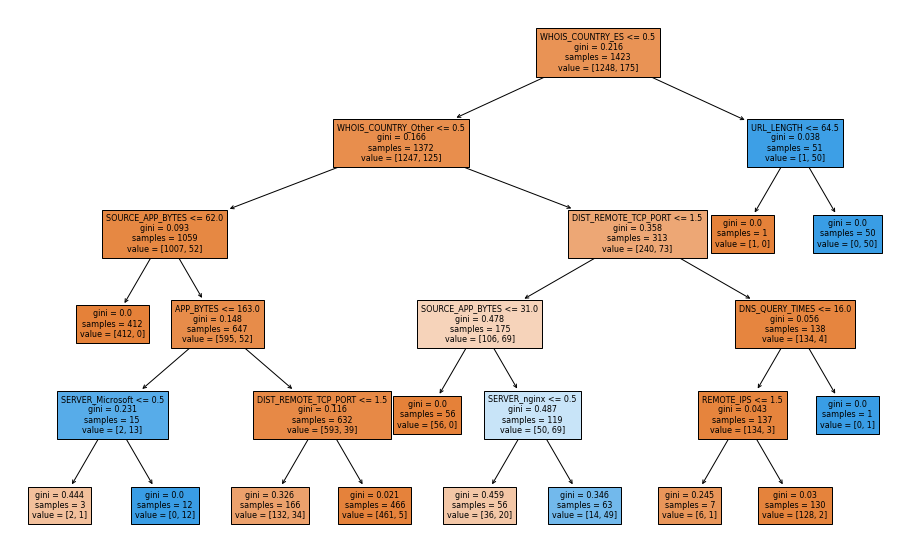

In [113]:
fig1 = plt.figure(figsize = (16,10))
from sklearn import tree
tree.plot_tree(dtree_model2,filled=True,feature_names= X.columns,fontsize=8)

Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [117]:
### The Grid Search CV returns all the parameter combinations possible along with the accuracy score generated.

In [116]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(),{
    'max_depth':[2,3,4,5,6,7,8,10,23],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[2,4,6,8,10]
    
},cv = 5)
clf.fit(X,y)
clf.cv_results_
df_grid = pd.DataFrame(clf.cv_results_)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009103,0.001442,0.004452,0.001490,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.123596,0.876404,0.879213,0.938202,0.211268,0.605737,0.359625,83
1,0.008761,0.001754,0.003866,0.000274,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.123596,0.876404,0.879213,0.938202,0.211268,0.605737,0.359625,83
2,0.007396,0.000490,0.003404,0.000490,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.123596,0.876404,0.879213,0.938202,0.211268,0.605737,0.359625,83
3,0.007996,0.000632,0.003203,0.000400,gini,2,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.123596,0.876404,0.879213,0.938202,0.211268,0.605737,0.359625,83
4,0.008057,0.000642,0.003195,0.000395,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.123596,0.876404,0.879213,0.938202,0.211268,0.605737,0.359625,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.014014,0.000642,0.003209,0.000395,entropy,23,2,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.435393,0.926966,0.904494,0.873596,0.205634,0.669217,0.294328,72
86,0.013196,0.000399,0.003623,0.000513,entropy,23,4,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.856742,0.929775,0.890449,0.873596,0.208451,0.751803,0.272754,27
87,0.012805,0.000403,0.003850,0.000439,entropy,23,6,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.862360,0.910112,0.896067,0.890449,0.208451,0.753488,0.272961,25
88,0.013002,0.000894,0.003334,0.000425,entropy,23,8,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.915730,0.912921,0.896067,0.890449,0.211268,0.765287,0.277177,5


#### Let’s look at the best parameter combination and the score

In [118]:
clf.best_score_
clf.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 8}

In [121]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)
dtree_model3 = DecisionTreeClassifier(criterion='entropy', max_depth = 7, min_samples_leaf=8).fit(X_train3, y_train3) 
dtree_predictions = dtree_model.predict(X_test3) 
from sklearn.metrics import classification_report
print(classification_report(dtree_predictions,y_test3))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       325
           1       0.63      0.84      0.72        31

    accuracy                           0.94       356
   macro avg       0.81      0.90      0.85       356
weighted avg       0.95      0.94      0.95       356



[Text(682.1746478873239, 509.625, 'WHOIS_COUNTRY_ES <= 0.5\nentropy = 0.538\nsamples = 1423\nvalue = [1248, 175]'),
 Text(521.8478873239436, 441.675, 'SOURCE_APP_BYTES <= 31.0\nentropy = 0.44\nsamples = 1372\nvalue = [1247, 125]'),
 Text(496.69859154929577, 373.725, 'entropy = 0.0\nsamples = 468\nvalue = [468, 0]'),
 Text(546.9971830985916, 373.725, 'DIST_REMOTE_TCP_PORT <= 1.5\nentropy = 0.58\nsamples = 904\nvalue = [779, 125]'),
 Text(352.0901408450704, 305.775, 'SOURCE_APP_BYTES <= 13338.0\nentropy = 0.963\nsamples = 300\nvalue = [184, 116]'),
 Text(201.1943661971831, 237.825, 'URL_LENGTH <= 43.5\nentropy = 1.0\nsamples = 209\nvalue = [106, 103]'),
 Text(100.59718309859154, 169.875, 'NUMBER_SPECIAL_CHARACTERS <= 8.5\nentropy = 0.931\nsamples = 104\nvalue = [36, 68]'),
 Text(50.29859154929577, 101.92500000000001, 'URL_LENGTH <= 31.5\nentropy = 0.902\nsamples = 44\nvalue = [30, 14]'),
 Text(25.149295774647886, 33.97500000000002, 'entropy = 1.0\nsamples = 26\nvalue = [13, 13]'),
 Text(

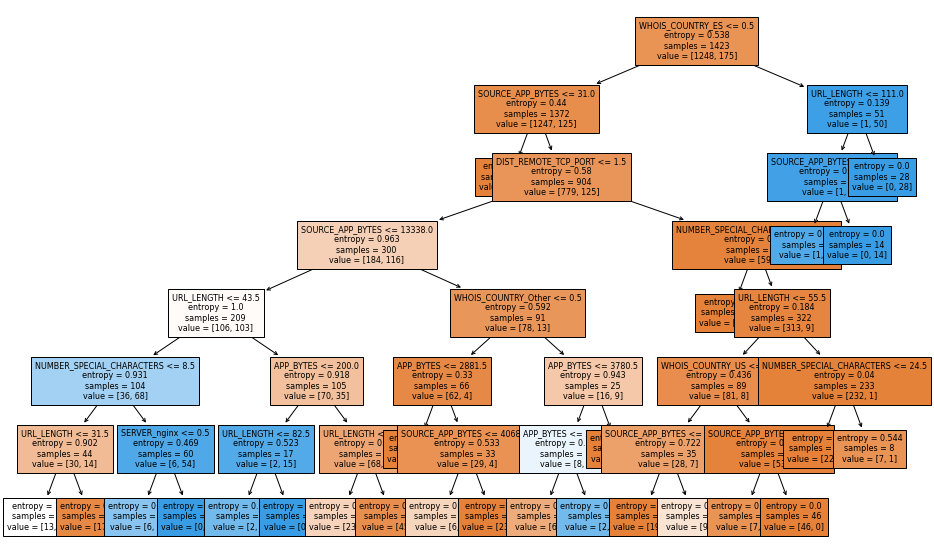

In [122]:
fig1 = plt.figure(figsize = (16,10))
from sklearn import tree
tree.plot_tree(dtree_model3,filled=True,feature_names= X.columns,fontsize=8)

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here